## Sprint 深層学習スクラッチ ニューラルネットワーク

**Sprintの目的**

- スクラッチを通してニューラルネットワークの基礎を理解する
- 画像データの扱い方を知る

**どのように学ぶか**

スクラッチで単純なニューラルネットワークを実装した後、学習と検証を行なっていきます。

## MNISTデータセット

ニューラルネットワークスクラッチの検証にはMNISTデータセットを使用します。各種ライブラリやサイトからダウンロードできますが、ここでは深層学習フレームワークのKerasを用います。以下のコードを実行すればデータセットをダウンロードし、展開まで行えます。

In [1]:
import numpy as np
from keras.datasets import mnist

In [2]:
(X_train, y_train), (X_test, y_test) = mnist.load_data()

**《MNISTとは？》**


画像分類のための定番データセットで、手書き数字認識を行います。このデータセットには訓練用6万枚、テスト用1万枚の28×28ピクセルの白黒画像、およびそれらが0〜9のどの数字であるかというラベルが含まれています。

**《画像データとは？》**


デジタル画像は点の集合で、これをピクセルと呼びます。一般的に白黒画像であればピクセルには0〜255の値が含まれます。一方、カラー画像であればR（赤）、G（緑）、B（青）それぞれに対応する0〜255の値が含まれます。機械学習をする上では、この0〜255の値一つひとつが特徴量として扱われます。0〜255は符号なしの8ビット整数で表せる範囲になるため、NumPyであれば「uint8」型の変数として保持できます。

### データセットの確認
どういったデータなのかを見てみます。

In [3]:
print(X_train.shape) # (60000, 28, 28)
print(X_test.shape) # (10000, 28, 28)
print(X_train[0].dtype) # uint8
print(X_train[0])

(60000, 28, 28)
(10000, 28, 28)
uint8
[[  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   3  18  18  18 126 136
  175  26 166 255 247 127   0   0   0   0]
 [  0   0   0   0   0   0   0   0  30  36  94 154 170 253 253 253 253 253
  225 172 253 242 195  64   0   0   0   0]
 [  0   0   0   0   0   0   0  49 238 253 253 253 253 253 253 253 253 251
   93  82  82  56  39   0   0   0   0   0]
 [  0   0   0   0   0   0 

各データは28×28ピクセルの白黒画像です。

### 平滑化
(1, 28, 28)の各画像を、(1, 784)に変換します。これまで学んできた機械学習手法や、今回扱う全結合層のみのニューラルネットワークではこの形で扱います。全てのピクセルが一列になっていることを、 平滑化（flatten） してあるという風に表現します。

In [4]:
X_train = X_train.reshape(-1, 784)
X_test = X_test.reshape(-1, 784)

**《補足》**


ここまで機械学習を学んでくる中で、特徴量の数を「次元」と呼んできました。その視点ではMNISTは784次元のデータです。一方で、NumPyのshapeが(784,)の状態を1次元配列とも呼びます。画像としての縦横の情報を持つ（28, 28)の状態であれば、2次元配列です。この視点では2次元のデータです。さらに、もしもカラー画像であれば(28, 28, 3)ということになり、3次元配列です。先ほどの視点では3次元のデータになります。しかし、白黒でもカラーでも平面画像であり、立体データではないという視点で、2次元のデータです。画像データを扱う際にはこのように「次元」という言葉が複数の意味合いで使われることに注意してください。

### 画像データの可視化
画像データを可視化します。plt.imshowに渡します。

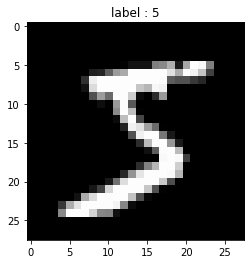

In [5]:
import matplotlib.pyplot as plt
%matplotlib inline
index = 0
image = X_train[index].reshape(28,28)
# X_train[index]: (784,)
# image: (28, 28)
plt.imshow(image, 'gray')
plt.title('label : {}'.format(y_train[index]))
plt.show()

[numpy.reshape — NumPy v1.17 Manual](https://docs.scipy.org/doc/numpy/reference/generated/numpy.reshape.html)


[matplotlib.pyplot.imshow — Matplotlib 3.1.1 documentation](https://matplotlib.org/api/_as_gen/matplotlib.pyplot.imshow.html)

**《発展的話題》**


画像データは符号なし8ビット整数のuint8型で保持されることが一般的ですが、plt.imshowはより自由な配列を画像として表示することが可能です。例えば、以下のようにマイナスの値を持ったfloat64型の浮動小数点であってもエラーにはならないし、先ほどと全く同じ風に表示されます。

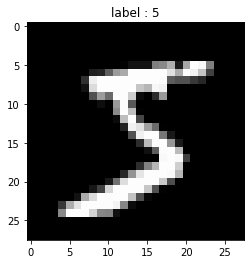

[[-105.35 -105.35 -105.35 -105.35 -105.35 -105.35 -105.35 -105.35 -105.35
  -105.35 -105.35 -105.35 -105.35 -105.35 -105.35 -105.35 -105.35 -105.35
  -105.35 -105.35 -105.35 -105.35 -105.35 -105.35 -105.35 -105.35 -105.35
  -105.35]
 [-105.35 -105.35 -105.35 -105.35 -105.35 -105.35 -105.35 -105.35 -105.35
  -105.35 -105.35 -105.35 -105.35 -105.35 -105.35 -105.35 -105.35 -105.35
  -105.35 -105.35 -105.35 -105.35 -105.35 -105.35 -105.35 -105.35 -105.35
  -105.35]
 [-105.35 -105.35 -105.35 -105.35 -105.35 -105.35 -105.35 -105.35 -105.35
  -105.35 -105.35 -105.35 -105.35 -105.35 -105.35 -105.35 -105.35 -105.35
  -105.35 -105.35 -105.35 -105.35 -105.35 -105.35 -105.35 -105.35 -105.35
  -105.35]
 [-105.35 -105.35 -105.35 -105.35 -105.35 -105.35 -105.35 -105.35 -105.35
  -105.35 -105.35 -105.35 -105.35 -105.35 -105.35 -105.35 -105.35 -105.35
  -105.35 -105.35 -105.35 -105.35 -105.35 -105.35 -105.35 -105.35 -105.35
  -105.35]
 [-105.35 -105.35 -105.35 -105.35 -105.35 -105.35 -105.35 -105.35 -1

In [6]:
index = 0
image = X_train[index].reshape(28,28)
image = image.astype(np.float) # float型に変換
image -= 105.35 # 意図的に負の小数値を作り出してみる
plt.imshow(image, 'gray')
plt.title('label : {}'.format(y_train[index]))
plt.show()
print(image) # 値を確認

これは、自動的に値を0〜255の整数に変換して処理するように作られているからです。uint8型であっても最小値が0、最大値が255でない場合には色合いがおかしくなります。それを防ぐためには次のように引数を入れてください。

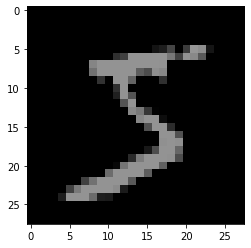

In [7]:
plt.imshow(image, 'gray', vmin = 0, vmax = 255)

画像関係のライブラリではこの自動的なスケーリングが思わぬ結果を生むことがあるので、新しいメソッドを使うときには確認しておきましょう。

### 前処理
画像は0から255のuint8型で表されますが、機械学習をする上では0から1のfloat型で扱うことになります。以下のコードで変換可能です。

In [8]:
X_train = X_train.astype(np.float)
X_test = X_test.astype(np.float)
X_train /= 255
X_test /= 255
print(X_train.max()) # 1.0
print(X_train.min()) # 0.0

1.0
0.0


また、正解ラベルは0から9の整数ですが、ニューラルネットワークで多クラス分類を行う際には **one-hot表現** に変換します。scikit-learnのOneHotEncoderを使用したコードが以下です。このone-hot表現による値はそのラベルである確率を示していることになるため、float型で扱います。

In [9]:
from sklearn.preprocessing import OneHotEncoder
enc = OneHotEncoder(handle_unknown='ignore', sparse=False)
y_train_one_hot = enc.fit_transform(y_train[:, np.newaxis])
y_test_one_hot = enc.transform(y_test[:, np.newaxis])
print(y_train.shape) # (60000,)
print(y_train_one_hot.shape) # (60000, 10)
print(y_train_one_hot.dtype) # float64

(60000,)
(60000, 10)
float64


In [10]:
y_train_one_hot[0]

array([0., 0., 0., 0., 0., 1., 0., 0., 0., 0.])

[sklearn.preprocessing.OneHotEncoder — scikit-learn 0.21.3 documentation](https://scikit-learn.org/stable/modules/generated/sklearn.preprocessing.OneHotEncoder.html)


さらに、訓練データ6万枚の内2割を検証データとして分割してください。訓練データが48000枚、検証データが12000枚となります。

In [11]:
from sklearn.model_selection import train_test_split
X_train, X_val, y_train, y_val = train_test_split(X_train, y_train, test_size=0.2)
print(X_train.shape) # (48000, 784)
print(X_val.shape) # (12000, 784)

(48000, 784)
(12000, 784)


## 2.ニューラルネットワークスクラッチ

ニューラルネットワークのクラスをスクラッチで作成していきます。NumPyなど最低限のライブラリのみを使いアルゴリズムを実装していきます。


今回は多クラス分類を行う3層のニューラルネットワークを作成します。層の数などは固定した上でニューラルネットワークの基本を学びます。次のSprintで層を自由に変えられる設計にしていきます。

### ミニバッチ処理

これまでの機械学習スクラッチでは、全てのサンプルを一度に計算していました。しかし、ニューラルネットワークではデータを分割して入力する **確率的勾配降下法** が一般的です。分割した際のひとかたまりを **ミニバッチ** 、そのサンプル数を **バッチサイズ** と呼びます。


今回はバッチサイズを20とします。今回使う訓練データは48000枚ですから、48000÷20で2400回の更新を繰り返すことになります。ニューラルネットワークではこれを2400回 **イテレーション（iteration）** すると呼びます。訓練データを一度全て見ると1回の **エポック（epoch）** が終わったことになります。このエポックを複数回繰り返し、学習が完了します。


これを実現するための簡素なイテレータを用意しました。for文で呼び出すと、ミニバッチを取得できます。

In [12]:
class GetMiniBatch:
    """
    ミニバッチを取得するイテレータ
    Parameters
    ----------
    X : 次の形のndarray, shape (n_samples, n_features)
      訓練データ
    y : 次の形のndarray, shape (n_samples, 1)
      正解値
    batch_size : int
      バッチサイズ
    seed : int
      NumPyの乱数のシード
    """
    def __init__(self, X, y, batch_size = 20, seed=0):
        self.batch_size = batch_size
        np.random.seed(seed)
        shuffle_index = np.random.permutation(np.arange(X.shape[0]))
        self._X = X[shuffle_index]
        self._y = y[shuffle_index]
        self._stop = np.ceil(X.shape[0]/self.batch_size).astype(np.int)
    def __len__(self):
        return self._stop
    def __getitem__(self,item):
        p0 = item*self.batch_size
        p1 = item*self.batch_size + self.batch_size
        return self._X[p0:p1], self._y[p0:p1]        
    def __iter__(self):
        self._counter = 0
        return self
    def __next__(self):
        if self._counter >= self._stop:
            raise StopIteration()
        p0 = self._counter*self.batch_size
        p1 = self._counter*self.batch_size + self.batch_size
        self._counter += 1
        return self._X[p0:p1], self._y[p0:p1]

このクラスをインスタンス化し、for文を使うことでミニバッチが取り出せます。

In [13]:
get_mini_batch = GetMiniBatch(X_train, y_train, batch_size=20)
print(len(get_mini_batch)) # 2400
print(get_mini_batch[5]) # 5番目のミニバッチが取得できる
for mini_X_train, mini_y_train in get_mini_batch:
    # このfor文内でミニバッチが使える
    pass

2400
(array([[0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       ...,
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.]]), array([3, 1, 1, 7, 1, 2, 9, 0, 8, 2, 1, 7, 7, 4, 4, 0, 2, 9, 4, 5],
      dtype=uint8))


__getitem__や__next__は__init__と同じ特殊メソッドの一種です。

### 学習
ニューラルネットワークの学習はフォワードプロパゲーションとバックプロパゲションの繰り返しになります。

## 【問題1】重みの初期値を決めるコードの作成

ニューラルネットワークの各層の重みの初期値を決めるコードを作成してください。


重みの初期値は様々な方法が提案されていますが、今回はガウス分布による単純な初期化を行います。バイアスに関しても同様です。


以下のコードを参考にしてください。標準偏差の値sigmaはハイパーパラメータです。発展的な重みの初期化方法については次のSprintで扱います。

In [14]:
n_features = 784
n_nodes1 = 400
sigma = 0.01 # ガウス分布の標準偏差
W1 = sigma * np.random.randn(n_features, n_nodes1)
# W1: (784, 400)

[numpy.random.randn — NumPy v1.15 Manual](https://docs.scipy.org/doc/numpy-1.15.0/reference/generated/numpy.random.randn.html)

## 【問題2】フォワードプロパゲーションの実装
三層のニューラルネットワークの **フォワードプロパゲーション** を作成してください。以下の説明ではノード数は1層目は400、2層目は200としますが、変更しても構いません。


各層の数式を以下に示します。今回はそれぞれの記号が表す配列が、実装上どのようなndarrayのshapeになるかを併記してあります。

## 【問題3】交差エントロピー誤差の実装
目的関数（損失関数）を作成します。

## 【問題4】バックプロパゲーションの実装
三層のニューラルネットワークのバックプロパゲーションを作成してください。確率的勾配降下法を行う部分です。

## 【問題5】推定
推定を行うメソッドを作成してください。


フォワードプロパゲーションによって出力された10個の確率の中で、最も高いものはどれかを判定します。

In [15]:
class ScratchSimpleNeuralNetrowkClassifier():
    """
    シンプルな三層ニューラルネットワーク分類器
    ----------
    lr : 学習率
    batch_size : バッチサイズ   
    n_epoch : エポック数
    sigma : ガウス分布の標準偏差
    verbose : Trueの場合、学習曲線をプロット
    ----------
    """
    n_features, n_nodes1, n_nodes2, n_output = 784, 400, 200, 10

    def __init__(self, batch_size=20, n_epoch=20, lr=0.01, verbose=True):
        self.verbose = verbose 
        self.batch_size = batch_size
        self.entropys = []
        self.val_entropys = []
        self.n_epoch = n_epoch
        self.lr = lr  # 学習率

        # 【問題1】重みの初期値を決めるコードの作成
        sigma = 0.01 # ガウス分布の標準偏差
        # 重みの初期化
        self.W1 = np.random.normal(0, sigma, (self.n_features, self.n_nodes1)) # (784, 400)
        self.W2 = np.random.normal(0, sigma, (self.n_nodes1, self.n_nodes2)) # (400, 200)
        self.W3 = np.random.normal(0, sigma, (self.n_nodes2, self.n_output)) # (200, 10)

        # バイアスの初期化
        self.B1 = np.random.normal(0, sigma, self.n_nodes1) # (400, )
        self.B2 = np.random.normal(0, sigma, self.n_nodes2) # (200, )
        self.B3 = np.random.normal(0, sigma, self.n_output) # (10, )

    def fit(self, X, y, X_val=None, y_val=None):
        """
        ニューラルネットワーク分類器を学習する。

        Parameters
        ----------
        X : 次の形のndarray, shape (n_samples, n_features)
            学習用データの特徴量
        y : 次の形のndarray, shape (n_samples, )
            学習用データの正解値
        X_val : 次の形のndarray, shape (n_samples, n_features)
            検証用データの特徴量
        y_val : 次の形のndarray, shape (n_samples, )
            検証用データの正解値
        """
        self.entropys = []  # 誤差を入れるリストを用意

        # yをone-hot表現に変換
        onehot_y = (y.reshape(-1, 1) == np.arange(self.n_output)).astype(np.float64)
        # バッチに分割
        get_mini_batch = GetMiniBatch(X, onehot_y, batch_size=self.batch_size) 

        # 検証用データが存在する場合
        if X_val is not None:
            # y_valをone-hot表現に変換
            onehot_y_val = (y_val.reshape(-1, 1) == np.arange(self.n_output)).astype(np.float64)
            # 交差エントロピー誤差を入れるリストを作っておく
            self.val_entropys = []

        # 学習開始(エポック数分繰り返す)
        for epoch in range(self.n_epoch):

            # ミニバッチの個数分ループ
            for mini_X_train, mini_y_train in get_mini_batch:

                # フォワードプロパゲーション
                A1, A2, Z1, Z2, Z3 = self.forward(mini_X_train)
                # バックプロパゲーション
                self._backprop(mini_X_train, mini_y_train, A1, A2, Z1, Z2, Z3)
                
            # エントロピーを計算するためXを予測
            Z3 = self.forward(X)[4]
            # 1サンプル毎の平均誤差をリストに格納
            self.entropys.append(self._forward_and_loss(Z3, onehot_y)) 

            # 検証用データが存在する場合
            if X_val is not None:
                Z3_val = self.forward(X_val)[4]
                self.val_entropys.append(
                    self._forward_and_loss(Z3_val, onehot_y_val))
                

    # 【問題2】フォワードプロパゲーションの実装
    def forward(self, X):
        """
        フォワードプロパゲーションの実装
        """
        # 一層目の処理
        A1 = X@self.W1 + self.B1 # 線形変換
        Z1 = self._sigmoid(A1) # 非線形変換

        # 二層目の処理
        A2 = Z1@self.W2 + self.B2  # 線形変換
        Z2 = self._sigmoid(A2) # 非線形変換

        # 三層目の処理
        A3 = Z2@self.W3 + self.B3  # 線形変換
        Z3 = self._softmax(A3) # 非線形変換
        return A1, A2, Z1, Z2, Z3

    # 【問題3】交差エントロピー誤差の実装
    def _forward_and_loss(self, Z, Y):
        """
        損失関数（目的関数）:交差エントロピー誤差
        """
        loss = -(Y * np.log(Z)).mean(axis=0).sum()
        return loss


    # 【問題4】バックプロパゲーションの実装
    def _backprop(self, X, Y, A1, A2, Z1, Z2, Z3):
        """
        バックプロパゲーションの実装
        """
        # 3層目の処理
        ga3 = (Z3 - Y) / self.batch_size
        self.B3 -= self.lr * ga3.sum(axis=0)
        self.W3 -= self.lr * Z2.T.dot(ga3)
        
        # 2層目の処理
        gz2 = ga3.dot(self.W3.T)
        ga2 = gz2 * (1 - Z2 ** 2)
        self.B2 -= self.lr * ga2.sum(axis=0)
        self.W2 -= self.lr * Z1.T.dot(ga2)

        # 1層目の処理
        gz1 = ga2.dot(self.W2.T)
        ga1 = gz1 * (1 - Z1 ** 2)
        self.B1 -= self.lr * ga1.sum(axis=0)
        self.W1 -= self.lr * X.T.dot(ga1)

    # 【問題5】推定
    def predict(self, X):
        """
        ニューラルネットワーク分類器を使い推定する。

        Parameters
        ----------
        X : 次の形のndarray, shape (n_samples, n_features)
            サンプル

        Returns
        -------
            次の形のndarray, shape (n_samples, 1)
            推定結果
        """
        pred = self.forward(X)[4]
        return np.argmax(pred, axis=1)

    def _sigmoid(self, A):
        return 1 / (1 + np.exp(-A))

    def _softmax(self, A):
        c = np.max(A)
        return np.exp(A - c) / np.sum(np.exp(A - c), axis=1).reshape(-1, 1)

## 3.検証

## 【問題6】学習と推定
MNISTのデータを学習・推定し、Accuracyを計算してください。

In [16]:
# MNISTのデータセットを再読み込み
(x_train, y_train), (x_test, y_test) = mnist.load_data()
X_train = x_train.reshape(-1, 784)
X_test = x_test.reshape(-1, 784)

In [17]:
# 前処理
X_train = X_train.astype(np.float)
X_test = X_test.astype(np.float)
X_train /= 255
X_test /= 255

In [18]:
# 分割
X_train, X_val, y_train, y_val = train_test_split(X_train, y_train, test_size=0.2)
print(X_train.shape) # (48000, 784)
print(X_val.shape) # (12000, 784)

(48000, 784)
(12000, 784)


In [19]:
snn_model = ScratchSimpleNeuralNetrowkClassifier() # インスタンス生成
snn_model.fit(X_train, y_train, X_val, y_val) # 学習
y_pred = snn_model.predict(X_val) # 推定

# Accuracyを計算
from sklearn.metrics import accuracy_score
print("Accuracy_score : ", accuracy_score(y_val, y_pred))

Accuracy_score :  0.8700833333333333


## 【問題7】学習曲線のプロット
学習曲線をプロットしてください。

ニューラルネットワークは過学習が発生しやすいため、学習曲線の確認が重要です。訓練データと検証データに対するエポックごとの損失（交差エントロピー誤差）を記録できるようにする必要があります。

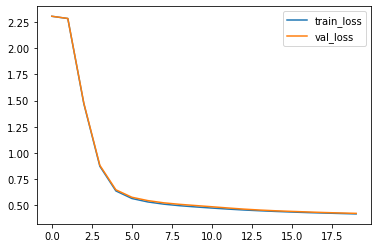

In [22]:
import matplotlib.pyplot as plt
plt.plot(snn_model.entropys, label='train_loss')
plt.plot(snn_model.val_entropys,label='val_loss')
plt.legend()
plt.show()